#Sobel Edge Detection

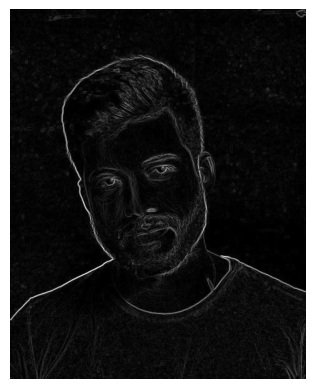

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/img1.jfif")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Step 1: Convert to grayscale

grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Step 2: Sobel X
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Step 2: Sobel Y

gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)  # Step 3: Compute final edges
gradient_magnitude = np.uint8(gradient_magnitude * 255 / gradient_magnitude.max())  # Normalize

plt.imshow(gradient_magnitude, cmap='grey')
plt.axis("off")
plt.show()





---



---



---



#Canny Edge Detection

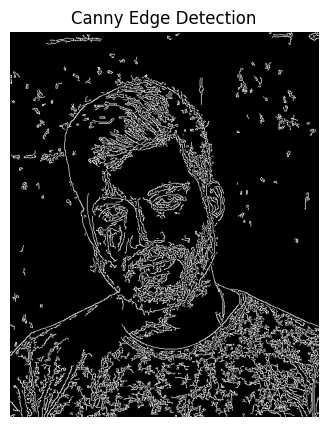

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread("/content/img1.jfif", cv2.IMREAD_GRAYSCALE)

# Step 1: Noise Reduction (Gaussian Blur)
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 2: Gradient Calculation (Sobel Operator)
grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X-direction
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y-direction
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)  # Edge strength
gradient_direction = np.arctan2(grad_y, grad_x)  # Edge direction

# Step 3: Non-Maximum Suppression (Thinning edges)
edges = cv2.Canny(image, 50, 150)  # Uses internal non-maximum suppression

# Display result
plt.figure(figsize=(10, 5))
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


#Harris Corner Detector

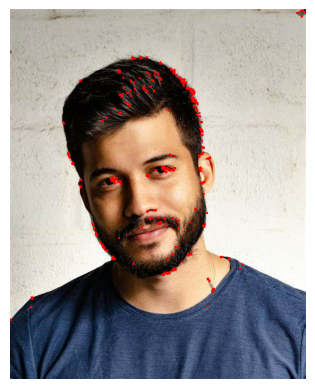

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and convert image to grayscale
image = cv2.imread("/content/img1.jfif")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Harris Corner Detector
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Step 3: Dilate corners for better visibility (optional)
harris_corners = cv2.dilate(harris_corners, None)

# Step 4: Mark detected corners in red
image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Step 5: Show the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


#SIFT Keypoint Detection

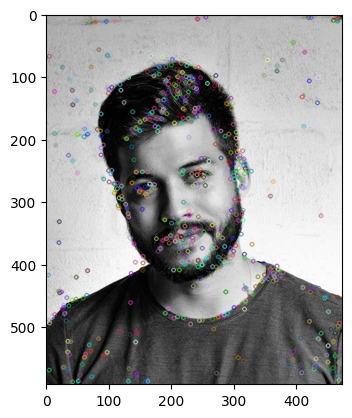

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image and convert to grayscale
image = cv2.imread("/content/img1.jfif", cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints
keypoints = sift.detect(image, None)

# Draw keypoints
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Show image
plt.imshow(image_with_keypoints, cmap='gray')
plt.show()


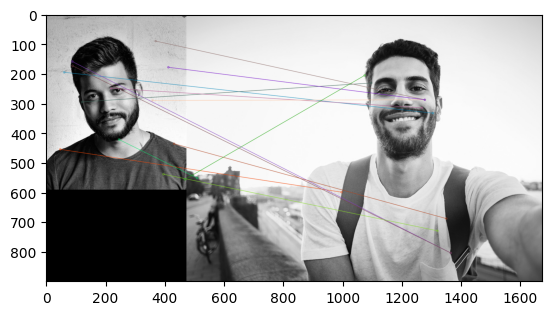

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load two images in grayscale
img1 = cv2.imread("/content/img1.jfif", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/img2.jpg", cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use BFMatcher to match keypoints
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test (Lowe's ratio test)
good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

# Draw matches
matched_img = cv2.drawMatchesKnn(img1, kp1, img2, kp2, [good_matches], None, flags=2)

# Show result
plt.imshow(matched_img)
plt.show()


Matching Percentage: 2.02%


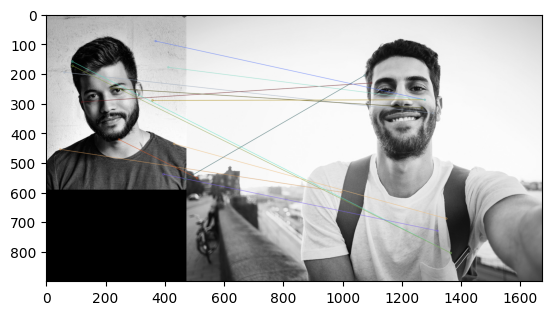

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load two images in grayscale
img1 = cv2.imread("/content/img1.jfif", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/img2.jpg", cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use BFMatcher to match keypoints
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test (Lowe's ratio test)
good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

# Compute matching percentage
total_keypoints = min(len(kp1), len(kp2))  # Choose the smaller number of keypoints
matching_percentage = (len(good_matches) / total_keypoints) * 100

# Print matching percentage
print(f"Matching Percentage: {matching_percentage:.2f}%")

# Draw matches
matched_img = cv2.drawMatchesKnn(img1, kp1, img2, kp2, [good_matches], None, flags=2)

# Show result
plt.imshow(matched_img)
plt.show()
